# TASK 1
Subtask 1: (DISCUSSED IN CLASS)
- Implementing the OLS closed form solution using numpy’s matrix operators to find the value of ‘m’ that minimizes SSE.

In [487]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import log
from sklearn import linear_model

%matplotlib inline

### let's load the data into a dataframe


In [488]:
data  = pd.read_csv('Assignment2.data', sep='\t')
data.head()

,SpringPos,StockPrice
0,2.27,3.48
1,6.38,2.99
2,8.61,5.86
3,8.65,1.79
4,13.17,3.47


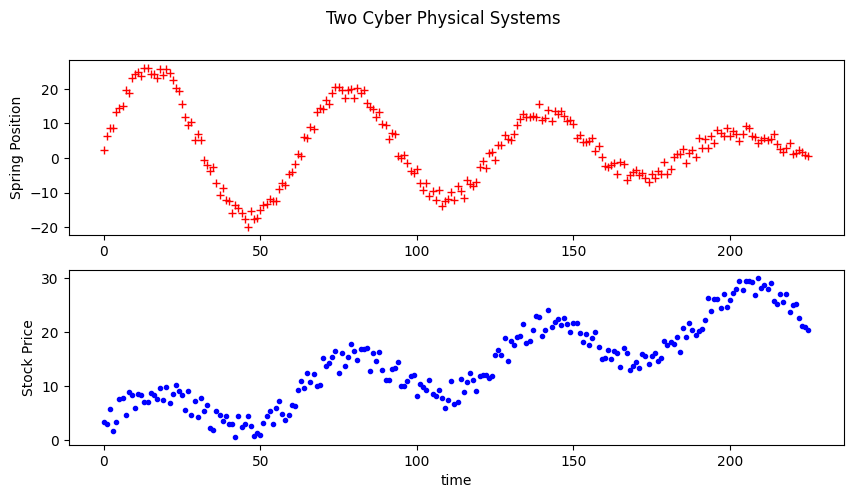

In [489]:
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('Two Cyber Physical Systems')
fig.set_figwidth(10)
fig.set_figheight(5)

ax1.plot(data.SpringPos, 'r+')
ax1.set_ylabel('Spring Position')
ax2.plot(data.StockPrice, 'b.')
ax2.set_ylabel('Stock Price')
ax2.set_xlabel('time')

plt.show()

## Fit a linear model on the dataset

In [490]:
y2 = pd.DataFrame({"x":range(226), "y":data.StockPrice})
y2.head()

,x,y
0,0,3.48
1,1,2.99
2,2,5.86
3,3,1.79
4,4,3.47


### transform the data into matrices

In [491]:
yy = np.array(y2.y)
xx = np.expand_dims(y2.x, 1)

### run the closed form solution to estimate the beta parameter.

In [492]:
numerator = np.matmul(np.transpose(xx), yy)
denom = np.matmul(np.transpose(xx), xx)
denom_inv = np.linalg.inv(denom)
beta = np.matmul(denom_inv, numerator)
print("Beta = ", beta[0])
sse = np.sum((xx*beta[0] - np.expand_dims(yy,1))**2)
print("SSE = ", sse)

Beta =  0.11899412514961837
SSE =  3850.335433080234


### as we will be reusing the above procedure often, let's make it a function

In [493]:
# estimate the value of the beta vector assuming that X is made of independent features.
def estimateBeta(X, y):
    numerator = np.matmul(np.transpose(X), y)
    denom = np.matmul(np.transpose(X), X)
    denom_inv = np.linalg.inv(denom)
    beta = np.matmul(denom_inv, numerator)
    return beta

# create a helper that would estimate ycap from X and beta.
def predict(beta, X):
    # reshape the input to a matrix, if it is appearing like an 1d array.
    if len(X.shape) != 2:
        X = np.expand_dims(X,1)
    # convert the beta list in to an array.
    beta = np.array(beta)
    # perform estimation of ycap.
    return np.matmul(X, beta)

# compute the sum of squared error between y and ycap.
def SSE(y, ycap):
    return np.sum((y-ycap)**2)

### Let's plot the raw data and the regression line on the same plot

Text(0.5, 0, 'Time')

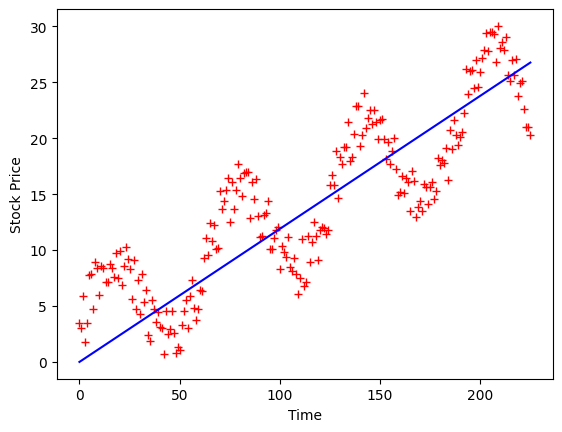

In [494]:
plt.plot(y2.x, y2.y, 'r+')
ycap1 = predict(beta, y2.x)
plt.plot(y2.x, ycap1, 'b-')  # ycap = y2.x*beta[0]
plt.ylabel('Stock Price')
plt.xlabel('Time')

### let's add an intercept (bias) to the data and check if the SSE drops further.

In [495]:
y2df = pd.DataFrame({"bias":np.ones(226), "x":range(226), "y":data.StockPrice})
yy = np.array(y2df.y)
xx = np.array(y2df[["bias","x"]])
y2df.head()

,bias,x,y
0,1.0,0,3.48
1,1.0,1,2.99
2,1.0,2,5.86
3,1.0,3,1.79
4,1.0,4,3.47


### estimate the beta params and compute the loss again

In [496]:
beta2 = estimateBeta(xx, yy)
print("beta =", beta2)
ycap2 = predict(beta2, xx)
loss = SSE(yy, ycap2)
print("SSE =", loss)

beta = [3.18244786 0.09782485]
SSE = 3274.298469663405


### interesting! the loss has dropped with a little bit on intercept.  Let's plot it side by side.

Text(0.5, 0, 'Time')

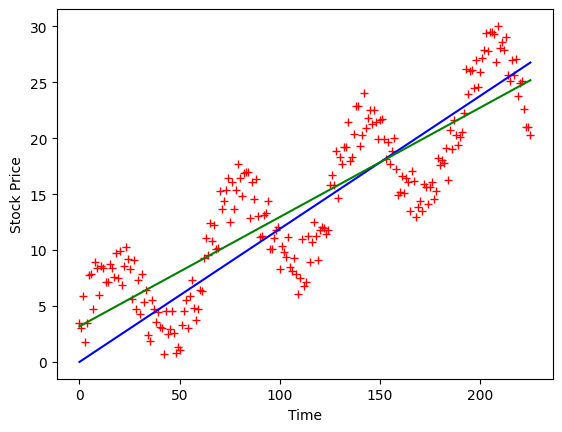

In [497]:
plt.plot(y2df.x, y2df.y, 'r+')
plt.plot(y2df.x, ycap1, 'b-')
plt.plot(y2df.x, ycap2, 'g-')
plt.ylabel('Stock Price')
plt.xlabel('Time')

# TASK 1:
Subtask 2:
- Implementing a linear search for m = tan θ, where θ in [0, 60]
- Creating a plot that shows SSE vs θ
- Reporting the θ that minimizes SSE.

In [498]:
import math
theta_degrees = list(np.arange(0, 65, 5))
theta_radians=np.radians(theta_degrees)
tan_values=[]
for x in theta_radians:
  tan_values.append(math.tan(x))
tanvalue_array=np.array(tan_values)
array1 = np.expand_dims(tanvalue_array,axis=0)
new_array = tanvalue_array.reshape(-1, 1)

In [499]:
def calculate_sse(new_array, y2_x, yy):
  predictions = [predict(i, y2_x) for i in new_array]
  losses = [SSE(yy, ycap) for ycap in predictions]
  return losses, predictions
sse, predictions=calculate_sse(new_array,y2.x, yy)
print(np.min(sse))

7644.253463286041


Visualizing Losses of θ models after normalizing between scale of 0 to 1

In [500]:
denom = max(sse) - min(sse)
norm_sse = [(x-min(sse))/denom for x in sse]

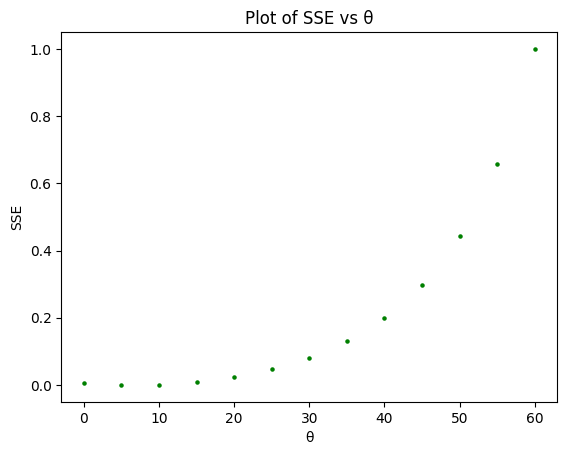

In [501]:
plt.scatter(theta_degrees,norm_sse, c='g', s = 5)
plt.xlabel('θ')
plt.ylabel('SSE')
plt.title('Plot of SSE vs θ')
plt.show()

From the plot above, SSE appears to be minimum at θ = 5 degrees

# TASK 1
Subtask 3: Implementing the solution using sklearn’s LinearRegression class

In [502]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
xtrain = y2df[['x']]
ytrain = y2df['y']
model.fit(xtrain, ytrain)
y_intercept = model.intercept_
weights = model.coef_
print(weights)
print(y_intercept)

[0.09782485]
3.1824478577833197


In [503]:
y_cap4 = model.predict(xtrain)
sse4 = SSE(ytrain, y_cap4)
print(sse4)

3274.298469663405


# TASK 1
Subtask 4: Comparing the estimated ‘m’ values through the above three methods


SSE obtained:
- using LinearRegression function = 3274.29
- OLS method with intercept = 3274.29
- Least SSE is obtained for θ of 5 degrees = 7644.25

Conclusion - SSE obtained is lesser in "OLS with intercept" than "tan 5 degree model". This is because the ideal value is obtained around θ of 6 degrees

# TASK 2
Subtask 1: Splitting data into Train, Eval & Test for Interpolation and Extrapolation

Splitting for Interpolation

In [504]:
from sklearn.model_selection import train_test_split

def split_data(data_frame, training_size=0.75, validation_size=0.15, testing_size=0.10, random_state=42):

  X_train, temp = train_test_split(data_frame, test_size=1 - training_size, random_state=random_state)
  adj_val_size = validation_size / (validation_size + testing_size)
  X_val, X_test = train_test_split(temp, test_size=adj_val_size, random_state=random_state)

  return X_train, X_val, X_test

In [505]:
xtrain_int, xvalidate_int, xtest_int = split_data(y2)
xtrain_int = xtrain_int.sort_values(by=['x'])
xvalidate_int = xvalidate_int.sort_values(by=['x'])
xtest_int = xtest_int.sort_values(by=['x'])

Splitting for Extrapolation

In [506]:
xtrain_ext = y2.iloc[28:197]
t1 = y2.iloc[:28]
t2 = y2.iloc[197:]
t3 = pd.concat([t1, t2])
xval_ext, xtest_ext = train_test_split(t3, test_size=0.66, random_state=42)
xval_ext = xval_ext.sort_values(by=['x'])
xtest_ext = xtest_ext.sort_values(by=['x'])

# TASK 2
Subtask 2: (DISCUSSED IN CLASS)
- Implementing the regression model using appropriate
feature transformation so that the SSE is lower than that of Task 1

### Let's model the periodicity

Let's borrow the slope information from the fit to set up the scale of the time axis.

Instead of using $x$ in integer scale, we shall use the floating point scale as $x_1 \leftarrow \beta_0 * x$

Likewise, let's create a new data dimension to capture the periodicity as $x_2 \leftarrow sin(x_1)$

Based on the expanded feature space, now let's try to model $\hat{y} = m_1 x_1 + m_2 x_2$, note that we don't have to use the intercept $c$ as our previous linear model passed through the origin.


### create a feature space appropriately

In [507]:
x1 = round(y2.x*beta2[1],2)
x2 = np.sin(x1)

y21 = pd.DataFrame({"bias":np.ones(226),"x":range(226), "x1":x1, "x2":x2, "y":data.StockPrice})
y21.head(10)

,bias,x,x1,x2,y
0,1.0,0,0.00,0.000000,3.48
1,1.0,1,0.10,0.099833,2.99
2,1.0,2,0.20,0.198669,5.86
3,1.0,3,0.29,0.285952,1.79
4,1.0,4,0.39,0.380188,3.47
5,1.0,5,0.49,0.470626,7.73
6,1.0,6,0.59,0.556361,7.83
7,1.0,7,0.68,0.628793,4.70
8,1.0,8,0.78,0.703279,8.97
9,1.0,9,0.88,0.770739,8.43


In [508]:
xx = np.array(y21[['bias', 'x1', 'x2']])
yy = np.array(y2.y)

In [509]:
beta3 = estimateBeta(xx, yy)
print("Beta = ", beta3)
ycap3 = predict(beta3, xx)
loss = SSE(yy, ycap3) #np.sum((np.matmul(xx,beta) - yy)**2)
print("SSE = ", loss)

Beta =  [2.74436632 1.00020159 4.82388129]
SSE =  701.3625743495965


### Let's plot the raw data and the regression line on the same plot

Text(0.5, 0, 'Time')

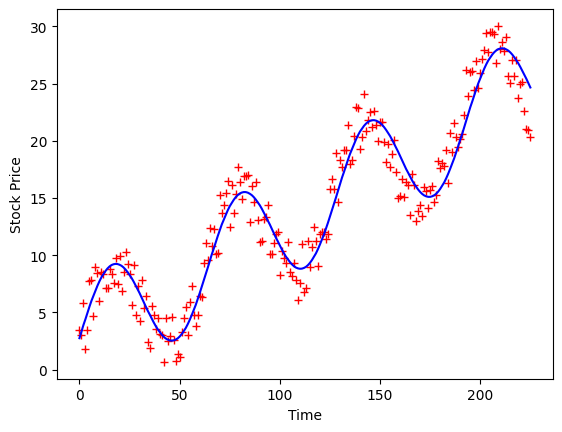

In [510]:
plt.plot(y2.x, y2.y, 'r+')
plt.plot(y2.x, ycap3, 'b-')
plt.ylabel('Stock Price')
plt.xlabel('Time')

### we were able to see the sin(x) from the visual.  what if we can't visualize? let's try the polynomial fit.

In [511]:
x1 = round(y2.x*beta2[1],2)

y22 = pd.DataFrame({"bias":np.ones(226),"x":range(226), "x1":x1, "y":data.StockPrice})
y22.head(10)

,bias,x,x1,y
0,1.0,0,0.00,3.48
1,1.0,1,0.10,2.99
2,1.0,2,0.20,5.86
3,1.0,3,0.29,1.79
4,1.0,4,0.39,3.47
5,1.0,5,0.49,7.73
6,1.0,6,0.59,7.83
7,1.0,7,0.68,4.70
8,1.0,8,0.78,8.97
9,1.0,9,0.88,8.43


### create the data matrices from the data frame

In [512]:
# here we don't need the explicit bias feature column, as polynomial features would include it already (x^0 = 1)
xx = np.array(y22[['x1']])
yy = np.array(y22.y)

### let's use the polynomial features generator instead of manually doing it.

In [513]:
from sklearn.preprocessing import PolynomialFeatures
poly_transformer = PolynomialFeatures(degree = 10)   # 10, 11
X_poly = poly_transformer.fit_transform(xx)

### fit the model and estimate the loss

In [514]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_poly, yy)
print("Intercept=", model.intercept_, "Beta = ", model.coef_)
ycap4 = model.predict(X_poly)
loss = SSE(yy, ycap4)
print("SSE = ", loss)

Intercept= 4.889491693705528 Beta =  [ 0.00000000e+00 -9.86993809e+00  2.63459056e+01 -1.90575021e+01
  6.32030184e+00 -1.14971851e+00  1.24286666e-01 -8.19847572e-03
  3.23849727e-04 -7.03798268e-06  6.47062066e-08]
SSE =  758.3498549536571


### Let's plot the raw data and the regression line on the same plot

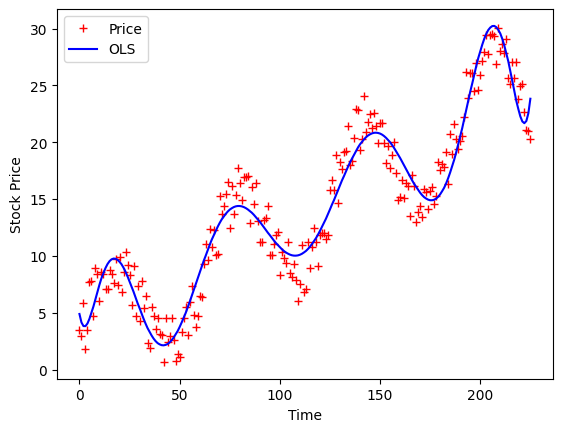

In [515]:
plt.plot(y2.x, y2.y, 'r+')
plt.plot(y2.x, ycap4, 'b-')
plt.ylabel('Stock Price')
plt.xlabel('Time')
plt.legend(['Price', 'OLS'], loc='upper left')
plt.show()

#TASK 2:
Subtask 3: Training the regression model for interpolation and evaluating the SSE

The data which was split above for interpolation will be trained below to obtain the missing data (stored as test data)

Generating appropiate feature spaces for splitted data

In [516]:
x1 = round(xtrain_int.x*beta2[1],2)
x2 = np.sin(x1)
df_train_int = pd.DataFrame({"bias":np.ones(169),"x":xtrain_int.x, "x1":x1, "x2":x2, "y":xtrain_int.y})
df_train_int.head(10)

,bias,x,x1,x2,y
0,1.0,0,0.00,0.000000,3.48
1,1.0,1,0.10,0.099833,2.99
2,1.0,2,0.20,0.198669,5.86
3,1.0,3,0.29,0.285952,1.79
4,1.0,4,0.39,0.380188,3.47
5,1.0,5,0.49,0.470626,7.73
6,1.0,6,0.59,0.556361,7.83
7,1.0,7,0.68,0.628793,4.70
8,1.0,8,0.78,0.703279,8.97
10,1.0,10,0.98,0.830497,6.00


In [517]:
xx = np.array(df_train_int[['bias', 'x1', 'x2']])
yy = np.array(df_train_int.y)
beta4 = estimateBeta(xx, yy)
print(beta4)
ycap6 = predict(beta4, xx)
loss = SSE(yy, ycap6)
print(loss)

[2.69812282 0.99364736 4.8621076 ]
540.636189693352


In [518]:
x1 = round(xvalidate_int.x*beta2[1],2)
x2 = np.sin(x1)
df_val_int = pd.DataFrame({"bias":np.ones(22),"x":xvalidate_int.x, "x1":x1, "x2":x2, "y":xvalidate_int.y})
df_val_int.head()

,bias,x,x1,x2,y
18,1.0,18,1.76,0.982154,9.72
24,1.0,24,2.35,0.711473,9.21
30,1.0,30,2.93,0.210017,4.28
67,1.0,67,6.55,0.263660,12.29
68,1.0,68,6.65,0.358644,10.08


In [519]:
xx = np.array(df_val_int[['bias', 'x1', 'x2']])
yy = np.array(df_val_int.y)
ycap7 = predict(beta4, xx)
loss = SSE(yy, ycap7)
print(loss)

51.65479657079046


In [520]:
x1 = round(xtest_int.x*beta2[1],2)
x2 = np.sin(x1)
df_test_int = pd.DataFrame({"bias":np.ones(35),"x":xtest_int.x, "x1":x1, "x2":x2, "y":xtest_int.y})
df_test_int.head()

,bias,x,x1,x2,y
9,1.0,9,0.88,0.770739,8.43
15,1.0,15,1.47,0.994924,8.76
16,1.0,16,1.57,1.000000,8.37
25,1.0,25,2.45,0.637765,8.35
38,1.0,38,3.72,-0.546691,3.54


In [521]:
xx = np.array(df_test_int[['bias', 'x1', 'x2']])
yy = np.array(df_test_int.y)
ycap8 = predict(beta4, xx)
loss = SSE(yy, ycap8)
print(loss)

112.61345369923858


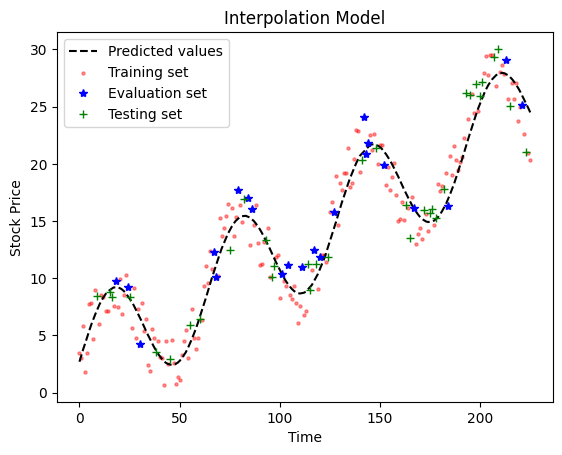

In [522]:
plt.plot(df_train_int.x, ycap6, "k--")
plt.scatter(df_train_int.x, df_train_int.y, c= "r",alpha = 0.4,s=5)
plt.plot(df_val_int.x, df_val_int.y, 'b*')
plt.plot(df_test_int.x, df_test_int.y, "g+")
plt.title("Interpolation Model")
plt.legend(["Predicted values","Training set", "Evaluation set", "Testing set"])
plt.ylabel('Stock Price')
plt.xlabel('Time')
plt.show()

# SSE values obtained during interpolation:
- Training: 540.636189693352
- Validation: 51.65479657079046
- Test: 112.61345369923858

# TASK 2
Subtask 4: Training the regression model for extrapolation and evaluating the SSE

In [523]:
x1 = round(xtrain_ext.x*beta2[1],2)
x2 = np.sin(x1)
df_train_ext = pd.DataFrame({"bias":np.ones(169),"x":xtrain_ext.x, "x1":x1, "x2":x2, "y":xtrain_ext.y})
df_train_ext.head(10)

,bias,x,x1,x2,y
28,1.0,28,2.74,0.390885,4.73
29,1.0,29,2.84,0.297041,7.35
30,1.0,30,2.93,0.210017,4.28
31,1.0,31,3.03,0.111361,7.82
32,1.0,32,3.13,0.011592,5.40
33,1.0,33,3.23,-0.088292,6.45
34,1.0,34,3.33,-0.187295,2.37
35,1.0,35,3.42,-0.274825,1.86
36,1.0,36,3.52,-0.369441,5.52
37,1.0,37,3.62,-0.460366,4.74


In [524]:
xx = np.array(df_train_ext[['bias', 'x1', 'x2']])
yy = np.array(df_train_ext.y)
beta5 = estimateBeta(xx, yy)
print(beta5)
ycap9 = predict(beta5, xx)
train_loss = SSE(yy, ycap9)
print(train_loss)

[2.56271685 1.02593841 4.87147248]
507.3947825126418


In [525]:
x1 = round(xval_ext.x*beta2[1],2)
x2 = np.sin(x1)
df_val_ext = pd.DataFrame({"bias":np.ones(19),"x":xval_ext.x, "x1":x1, "x2":x2, "y":xval_ext.y})
df_val_ext.head()

,bias,x,x1,x2,y
1,1.0,1,0.10,0.099833,2.99
2,1.0,2,0.20,0.198669,5.86
7,1.0,7,0.68,0.628793,4.70
10,1.0,10,0.98,0.830497,6.00
14,1.0,14,1.37,0.979908,7.11


In [526]:
xx = np.array(df_val_ext[['bias', 'x1', 'x2']])
yy = np.array(df_val_ext.y)

In [527]:
ycap10 = predict(beta5, xx)
loss = SSE(yy, ycap10)
print(loss)

60.37059746129191


In [528]:
x1 = round(xtest_ext.x*beta2[1],2)
x2 = np.sin(x1)
df_test_ext = pd.DataFrame({"bias":np.ones(38),"x":xtest_ext.x, "x1":x1, "x2":x2, "y":xtest_ext.y})
df_test_ext.head()

,bias,x,x1,x2,y
0,1.0,0,0.00,0.000000,3.48
3,1.0,3,0.29,0.285952,1.79
4,1.0,4,0.39,0.380188,3.47
5,1.0,5,0.49,0.470626,7.73
6,1.0,6,0.59,0.556361,7.83


In [529]:
xx = np.array(df_test_ext[['bias', 'x1', 'x2']])
yy = np.array(df_test_ext.y)

In [530]:
ycap11 = predict(beta5, xx)
loss = SSE(yy, ycap11)
print(loss)

142.4781825481606


In [531]:
xx = np.array(y21[['bias', 'x1', 'x2']])
yy = np.array(y21.y)

In [532]:
ycap12 = predict(beta5, xx)
loss = SSE(yy, ycap12)
print(loss)

710.2435625220943


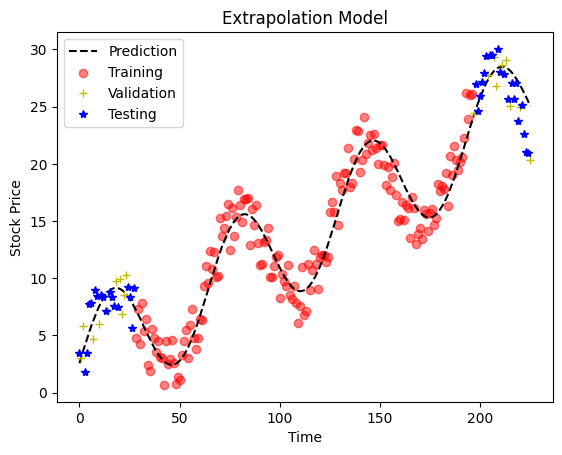

In [533]:
plt.plot(y21.x, ycap12, "k--")
plt.scatter(xtrain_ext.x, xtrain_ext.y, c= "r",alpha = 0.5)
plt.plot(xval_ext.x, xval_ext.y, 'y+')
plt.plot(xtest_ext.x, xtest_ext.y, "b*")
plt.title("Extrapolation Model")
plt.legend(["Prediction","Training", "Validation", "Testing" ])
plt.ylabel('Stock Price')
plt.xlabel('Time')
plt.show()

# SSE values obtained during Extrapolation:
- Training: 507.3947825126418
- Validation: 60.37059746129191
- Testing: 142.4781825481606
- Entire Model: 710.2435625220943

# TASK 3

By analysing the data visually, we can figure out that a linear model will not be a good fit for the spring position data (similar to what we observed in stock price data). Thereby, we need to find an appropriate mathematical model to fit the given data.

Visualizing the given Spring Data

Text(0, 0.5, 'Spring Position')

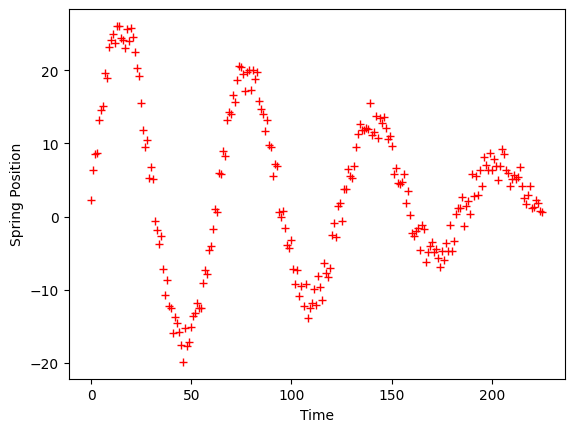

In [534]:
plt.plot(data['SpringPos'],'r+');
plt.xlabel('Time')
plt.ylabel('Spring Position')

In [535]:
df_spr = pd.DataFrame({'x':range(226), 'y':data.SpringPos})

In [536]:
df_spr.head()

,x,y
0,0,2.27
1,1,6.38
2,2,8.61
3,3,8.65
4,4,13.17



##The model is of the form:

y = β0 + β1x1 + β2x2 + β3x3

##Justification:
- The Spring position data repeats after equal intervals of time indicating periodicity. Aslo, the spring appears to dampen with time i.e. it's amplitude decreases with time.

To capture these features:
- we are scaling x by (3.5 * 2π / 226) * x as approximately 3.5 cycles of the wave are completed and there are 226 data points.

- To capture the peroidicity, we are introducing the sine function in the model

- The dampening factor is captured by multiplying time with x2


In [537]:
x1 = 7*np.pi * df_spr['x']/226
x2 = np.sin(x1)
x3 = x1*x2

In [538]:
df2=pd.DataFrame({'bias':np.ones(226),'x':range(226), 'x1': x1, 'x2':x2, 'x3':x3, 'y':data['SpringPos']})

In [539]:
df2.head(10)

,bias,x,x1,x2,x3,y
0,1.0,0,0.000000,0.000000,0.000000,2.27
1,1.0,1,0.097306,0.097152,0.009454,6.38
2,1.0,2,0.194612,0.193386,0.037635,8.61
3,1.0,3,0.291918,0.287790,0.084011,8.65
4,1.0,4,0.389224,0.379470,0.147699,13.17
5,1.0,5,0.486530,0.467561,0.227482,14.52
6,1.0,6,0.583836,0.551228,0.321827,15.12
7,1.0,7,0.681142,0.629680,0.428902,19.62
8,1.0,8,0.778448,0.702175,0.546607,18.91
9,1.0,9,0.875754,0.768026,0.672602,23.17


In [540]:
xx = np.array(df2[['bias','x1','x2','x3']])
yy = np.array(df2.y)

In [541]:
weights = estimateBeta(xx, yy)
ycap = predict(weights, xx)
loss = SSE(yy, ycap)
print("Coefficients: ", weights)
print("SSE:", loss)

Coefficients:  [ 2.50026929e+00  9.06323007e-03  2.49622297e+01 -1.08353303e+00]
SSE: 1628.9666243174588


Text(0.5, 0, 'Time')

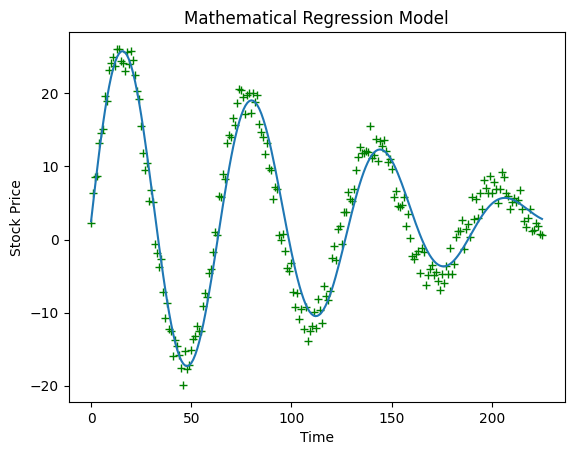

In [542]:
plt.plot(df_spr.x, df_spr.y, 'g+')
plt.plot(df_spr.x, ycap)
plt.title("Mathematical Regression Model")
plt.ylabel('Stock Price')
plt.xlabel('Time')

SSE for this Mathematical regression model is 1628.9666243174588

### Part 2

Interpolation and Extrapolation for Spring Position Data

I) Interpolation - Spring Position

In [543]:
xtrain_int, xval_int, xtest_int = split_data(df_spr)

In [544]:
xtrain_int = xtrain_int.sort_values(by=['x'])
xval_int = xval_int.sort_values(by=['x'])
xtest_int = xtest_int.sort_values(by=['x'])

In [545]:
xtrain_int.head(10)

,x,y
0,0,2.27
1,1,6.38
2,2,8.61
3,3,8.65
4,4,13.17
5,5,14.52
6,6,15.12
7,7,19.62
8,8,18.91
10,10,24.17


In [546]:
x1 = 7*np.pi * xtrain_int['x']/226
x2 = np.sin(x1)
x3 = x1*x2
df_xtrain=pd.DataFrame({'bias':np.ones(169),'x':xtrain_int.x, 'x1': x1, 'x2':x2, 'x3':x3, 'y':xtrain_int.y})
df_xtrain.head(10)

,bias,x,x1,x2,x3,y
0,1.0,0,0.000000,0.000000,0.000000,2.27
1,1.0,1,0.097306,0.097152,0.009454,6.38
2,1.0,2,0.194612,0.193386,0.037635,8.61
3,1.0,3,0.291918,0.287790,0.084011,8.65
4,1.0,4,0.389224,0.379470,0.147699,13.17
5,1.0,5,0.486530,0.467561,0.227482,14.52
6,1.0,6,0.583836,0.551228,0.321827,15.12
7,1.0,7,0.681142,0.629680,0.428902,19.62
8,1.0,8,0.778448,0.702175,0.546607,18.91
10,1.0,10,0.973060,0.826611,0.804342,24.17


In [547]:
xx = np.array(df_xtrain[['bias', 'x1','x2','x3']])
yy = np.array(df_xtrain.y)
weights = estimateBeta(xx, yy)
ycap = predict(weights, xx)
loss = SSE(yy, ycap)
print("Coefficients: ", weights)
print("SSE:", loss)

Coefficients:  [ 2.49982979e+00  1.25242930e-02  2.49894252e+01 -1.08617981e+00]
SSE: 1335.5621365436741


In [548]:
x1 = 7*np.pi * xval_int['x']/226
x2 = np.sin(x1)
x3 = x1*x2
df_xval=pd.DataFrame({'bias':np.ones(22),'x':xval_int.x, 'x1': x1, 'x2':x2, 'x3':x3, 'y':xval_int.y})
df_xval.head()

,bias,x,x1,x2,x3,y
18,1.0,18,1.751507,0.983716,1.722986,25.71
24,1.0,24,2.335343,0.721696,1.685408,19.27
30,1.0,30,2.919179,0.220584,0.643925,6.80
67,1.0,67,6.519500,0.234121,1.526353,8.23
68,1.0,68,6.616806,0.327466,2.166779,13.22


In [549]:
xx = np.array(df_xval[['bias', 'x1','x2','x3']])
yy = np.array(df_xval.y)
ycap2 = predict(weights, xx)
loss = SSE(yy, ycap2)
print("SSE:", loss)

SSE: 165.1270811224688


In [550]:
x1 = 7*np.pi * xtest_int['x']/226
x2 = np.sin(x1)
x3 = x1*x2
df_xtest=pd.DataFrame({'bias':np.ones(35),'x':xtest_int.x, 'x1': x1, 'x2':x2, 'x3':x3, 'y':xtest_int.y})
df_xtest.head()

,bias,x,x1,x2,x3,y
9,1.0,9,0.875754,0.768026,0.672602,23.17
15,1.0,15,1.459590,0.993823,1.450573,24.40
16,1.0,16,1.556895,0.999903,1.556745,24.21
25,1.0,25,2.432649,0.651032,1.583733,15.58
38,1.0,38,3.697627,-0.527822,-1.951688,-8.69


In [551]:
xx = np.array(df_xtest[['bias', 'x1','x2','x3']])
yy = np.array(df_xtest.y)
ycap3  = predict(weights, xx)
loss = SSE(yy, ycap3)
print("SSE:", loss)

SSE: 128.68768023040232


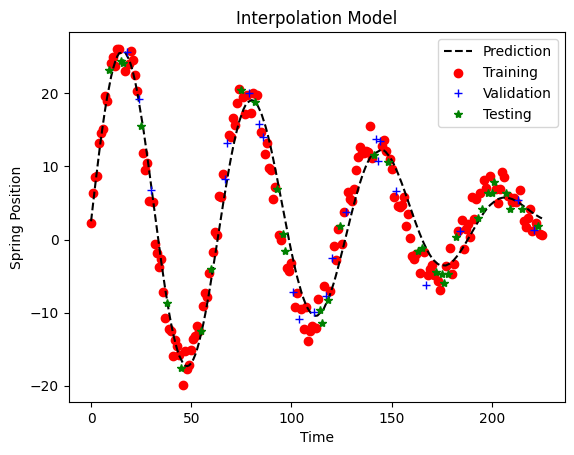

In [552]:
plt.plot(df_xtrain.x, ycap, "k--")
plt.scatter(xtrain_int.x, xtrain_int.y, c= "r")
plt.plot(xval_int.x, xval_int.y, 'b+')
plt.plot(xtest_int.x, xtest_int.y,"g*")
plt.title("Interpolation Model")
plt.legend(["Prediction","Training", "Validation", "Testing"])
plt.ylabel('Spring Position')
plt.xlabel('Time')
plt.show()

SSE values for Interpolation model:
- training: 1335.5621365436741
- Evaluation: 165.1270811224688
- Testing: 128.68768023040232

In [553]:
xtrain_ext = df_spr.iloc[28:197]
t1 = df_spr.iloc[:28]
t2 = df_spr.iloc[197:]
t3 = pd.concat([t1, t2])
xval_ext, xtest_ext = train_test_split(t3, test_size=0.66, random_state=42)
xval_ext = xval_ext.sort_values(by=['x'])
xtest_ext = xtest_ext.sort_values(by=['x'])

In [554]:
xtrain_ext.head(10)

,x,y
28,28,10.53
29,29,5.32
30,30,6.80
31,31,5.13
32,32,-0.64
33,33,-1.91
34,34,-3.77
35,35,-2.60
36,36,-7.16
37,37,-10.78


In [555]:
x1 = 7*np.pi * xtrain_ext['x']/226
x2 = np.sin(x1)
x3 = x1*x2

In [556]:
df_xtrain2=pd.DataFrame({'bias':np.ones(169),'x':xtrain_ext.x, 'x1': x1, 'x2':x2, 'x3':x3, 'y':xtrain_ext.y})
df_xtrain2.head()

,bias,x,x1,x2,x3,y
28,1.0,28,2.724567,0.405043,1.103566,10.53
29,1.0,29,2.821873,0.314300,0.886916,5.32
30,1.0,30,2.919179,0.220584,0.643925,6.80
31,1.0,31,3.016485,0.124782,0.376402,5.13
32,1.0,32,3.113791,0.027798,0.086558,-0.64


In [557]:
xx = np.array(df_xtrain2[['bias', 'x1','x2','x3']])
yy = np.array(df_xtrain2.y)

In [558]:
weights2 = estimateBeta(xx, yy)
ycap2 = predict(weights2, xx)
loss = SSE(yy, ycap2)
print("Coefficients: ", weights2)
print("SSE:", loss)

Coefficients:  [ 2.47244037e+00  5.46668279e-03  2.50485864e+01 -1.10264718e+00]
SSE: 1446.5357170018444


In [559]:
x1 = 7*np.pi * xval_ext['x']/226
x2 = np.sin(x1)
x3 = x1*x2
df_xval2=pd.DataFrame({'bias':np.ones(19),'x':xval_ext.x, 'x1': x1, 'x2':x2, 'x3':x3, 'y':xval_ext.y})
df_xval2.head()

,bias,x,x1,x2,x3,y
1,1.0,1,0.097306,0.097152,0.009454,6.38
2,1.0,2,0.194612,0.193386,0.037635,8.61
7,1.0,7,0.681142,0.629680,0.428902,19.62
10,1.0,10,0.973060,0.826611,0.804342,24.17
14,1.0,14,1.362284,0.978340,1.332776,26.09


In [560]:
xx = np.array(df_xval2[['bias', 'x1','x2','x3']])
yy = np.array(df_xval2.y)
ycap4 = predict(weights2, xx)
loss = SSE(yy, ycap4)
print("SSE:", loss)

SSE: 45.81609856091815


In [561]:
x1 = 7*np.pi * xtest_ext['x']/226
x2 = np.sin(x1)
x3 = x1*x2
df_xtest2=pd.DataFrame({'bias':np.ones(38),'x':xtest_ext.x, 'x1': x1, 'x2':x2, 'x3':x3, 'y':xtest_ext.y})
df_xtest2.head()

,bias,x,x1,x2,x3,y
0,1.0,0,0.000000,0.000000,0.000000,2.27
3,1.0,3,0.291918,0.287790,0.084011,8.65
4,1.0,4,0.389224,0.379470,0.147699,13.17
5,1.0,5,0.486530,0.467561,0.227482,14.52
6,1.0,6,0.583836,0.551228,0.321827,15.12


In [562]:
xx = np.array(df_xtest2[['bias', 'x1','x2','x3']])
yy = np.array(df_xtest2.y)
ycap5 = predict(weights2, xx)
loss = SSE(yy, ycap5)
print("SSE:", loss)

SSE: 141.80703871648333


In [563]:
xx = np.array(df2[['bias', 'x1','x2','x3']])
yy = np.array(df2.y)
y_ = predict(weights2, xx)
loss = SSE(yy, y_)
print("SSE:", loss)

SSE: 1634.1588542792456


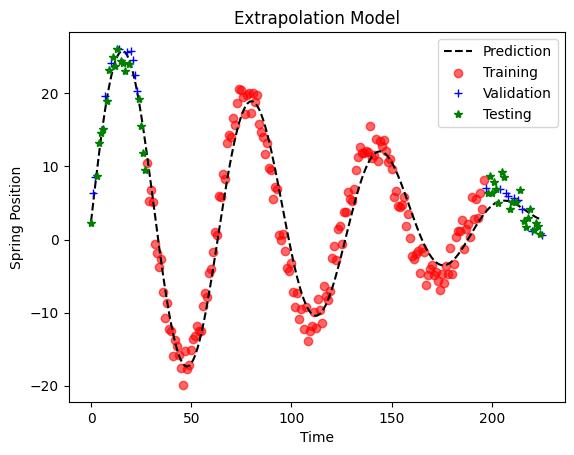

In [564]:
plt.plot(df2.x, y_, "k--")
plt.scatter(df_xtrain2.x, df_xtrain2.y, c= "r", alpha = 0.6)
plt.plot(df_xval2.x, df_xval2.y, 'b+')
plt.plot(df_xtest2.x, df_xtest2.y, "g*")
plt.legend(["Prediction","Training", "Validation", "Testing"])
plt.ylabel('Spring Position')
plt.xlabel('Time')
plt.title("Extrapolation Model")
plt.show()

SSE values for Extrapolation model:
- Training: 1446.5357170018444
- Validation: 45.81609856091815
- Testing: 141.80703871648333
- Entire Model: 1634.1588542792456